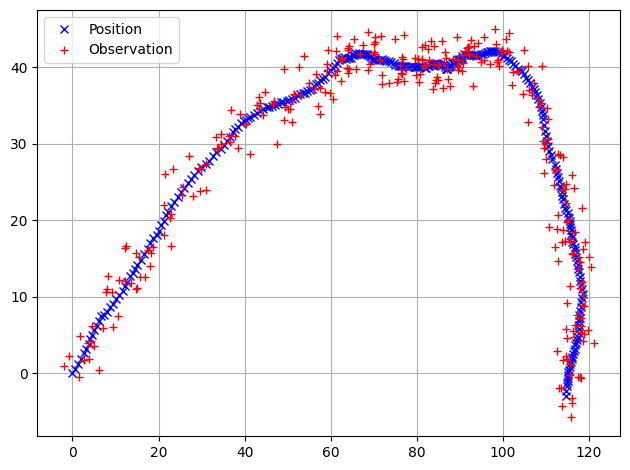

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def load_var(name):
    val = []
    with open(name+".csv", "r") as fd:
        val = [float(x) for x in fd.read().strip().split(",")]
    return np.array(val)

u = load_var("u")
v = load_var("v")
x = load_var("x")
y = load_var("y")

plt.plot(x, y, "bx", label="Position")
plt.plot(u, v, "r+", label="Observation")
# plt.axis('equal')
plt.tight_layout()
plt.grid()
plt.legend()

Observation outside validation gate
Observation outside validation gate
Observation outside validation gate
Observation outside validation gate
Observation outside validation gate
Observation outside validation gate
Observation outside validation gate
Observation outside validation gate
Observation outside validation gate
Observation outside validation gate
Observation outside validation gate
Observation outside validation gate
Observation outside validation gate
RMS Error:  1.2043837873152587


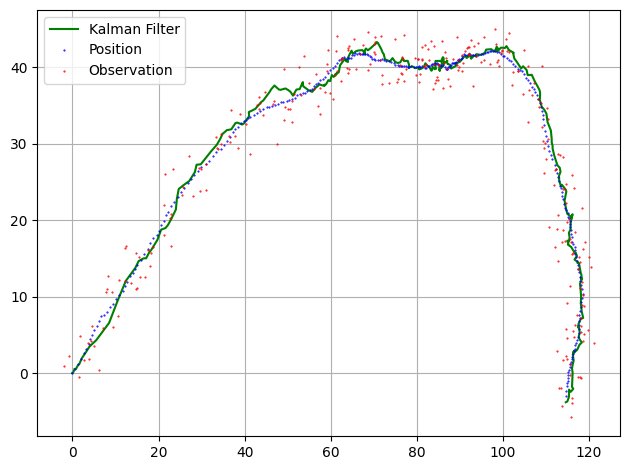

In [31]:
def kalmanPredict(x, P, F, Q):
    xp = F @ x; # predict state
    Pp = F @ P @ F.transpose() + Q; # predict state covariance
    return xp, Pp

def kalmanUpdate(x, P, H, R, z):
    # print(H.shape, P.shape, R.shape)
    S = H @ P @ H.transpose() + R; # innovation covariance
    K = P @ H.transpose() @ np.linalg.inv(S); # Kalman gain
    zp = H @ x; # predicted observation

    gate = (z - zp).transpose() @ np.linalg.inv(S) @ (z - zp);

    if gate > 9.21:
    # if gate > 10000000:
        plt.plot(z[0], z[1], "ro", label="excluded observation")
        print('Observation outside validation gate');
        xe = x;
        Pe = P;
    else:
        xe = x + K @ (z - zp); # estimated state
        Pe = P - K @ S @ K.transpose(); # estimated covariance

    return xe, Pe

def kalmanTracking(z):
    dt = 0.033; # time interval
    N = len(z[0]); # number of samples
    F = np.array([
        [1,dt,0,0],
        [0,1,0,0],
        [0,0,1,dt],
        [0,0,0,1]]) # CV motion model
    Q = np.array([
        [0.01,0,0,0],
        [0,1,0,0],
        [0,0,0.01,0],
        [0,0,0,1]]) # motion noise
    H = np.array([
        [1,0,0,0],
        [0,0,1,0]]) # Cartesian observation model
    R = np.array([[4, 0], [0, 4]]) # observation noise
    x = np.array([0,0,0,0]).transpose(); # initial state
    P = Q; # initial state covariance
    s = np.zeros([4,N]);
    for i in range(N):
        xp, Pp = kalmanPredict(x, P, F, Q);
        x, P = kalmanUpdate(xp, Pp, H, R, z[:,i]);
        s[:,i] = x; # save current state

    px = s[0,:] # NOTE: s(2, :) and s(4, :), not considered here,
    py = s[2,:]

    return px, py

# print(len(u), len(v))
px, py = kalmanTracking(np.array([u, v]))

plt.plot(px, py, "g-", label="Kalman Filter")
plt.plot(x, y, "b.", label="Position", ms=1)
plt.plot(u, v, "r.", label="Observation", ms=1)
# plt.axis('equal')
plt.tight_layout()
plt.grid()
plt.legend()

e = np.sqrt((px - x)**2 + (py - y)**2)
rms = np.sqrt(np.sum(e) / len(e))
print("RMS Error: ", rms)



RMS Error:  1.061481785249492
